##  Warm-up: Basic deterministic under-sampling
In this first notebook, we start with simple deterministic under-sampling
using low-freq and high-freq only masks. Hence we want to generate a sampling mask $\Omega$ such that $y = F_{\Omega} x$ where $x$ is the original image. The data $y$ is then corrupted by additive noise $b$. 
We consider: 
* a low-frequency mask, i.e. where $\Omega$ is defined as a square around the center of k-space. 
* a high-frequency mask,  i.e. where $\Omega$ is defined as a inner square sticked to the max frequency $K_{max}$.

<IPython.core.display.Javascript object>


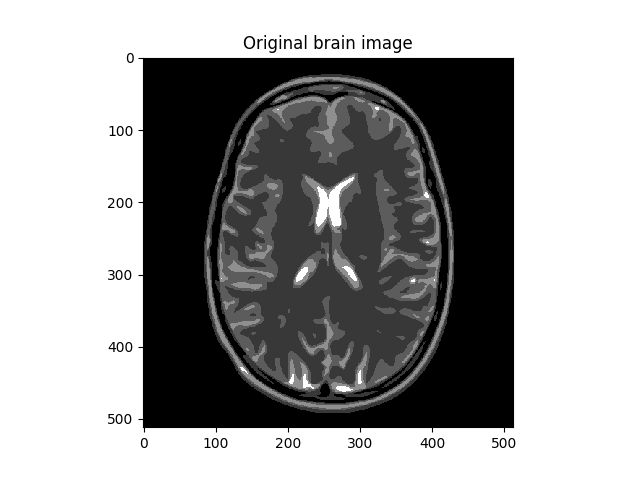

In [1]:
#DISPLAY BRAIN PHANTOM
%matplotlib nbagg
import sys

import numpy as np
import os.path as op
import os
import math ; import cmath
import matplotlib.pyplot as plt

from skimage import data, io
#get current working dir
cwd = os.getcwd()
#cwd= "/"
dirimg_2d = op.join(cwd,"../data")
img_size = 512   #256
FOV = 0.2 #field of view in m
pixelSize = FOV/img_size

#load data file corresponding to the target resolution
filename = "BrainPhantom" + str(img_size) + ".png"
mri_filename = op.join(dirimg_2d, filename)
mri_img = io.imread(mri_filename)
#mri_img = io.imread(mri_filename, as_gray=True)
#print(mri_img.dtype)
plt.figure()
plt.title("Brain Phantom, size = "+ str(img_size))
if mri_img.ndim == 2:
    plt.imshow(mri_img, cmap=plt.cm.gray)
else:
    plt.imshow(mri_img)
plt.title("Original brain image")
plt.show()
#plt.close()


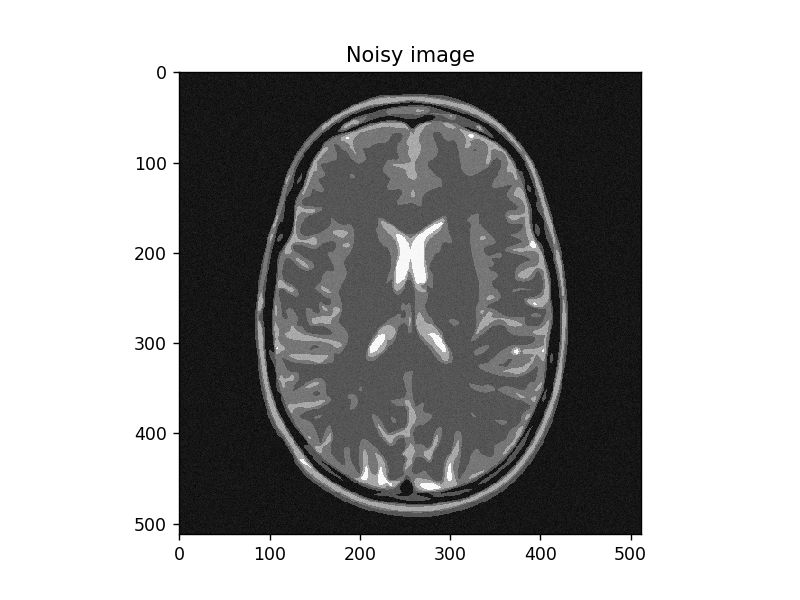

In [9]:
# Plot Noisy image
new_img = np.copy(mri_img.astype('float64'))
new_img += np.random.randn(*mri_img.shape) * 0.
#print(mri_img.shape)

if 1:
    plt.figure()
    plt.imshow(new_img, cmap='Greys_r')
    plt.title("Noisy image")
    plt.show()



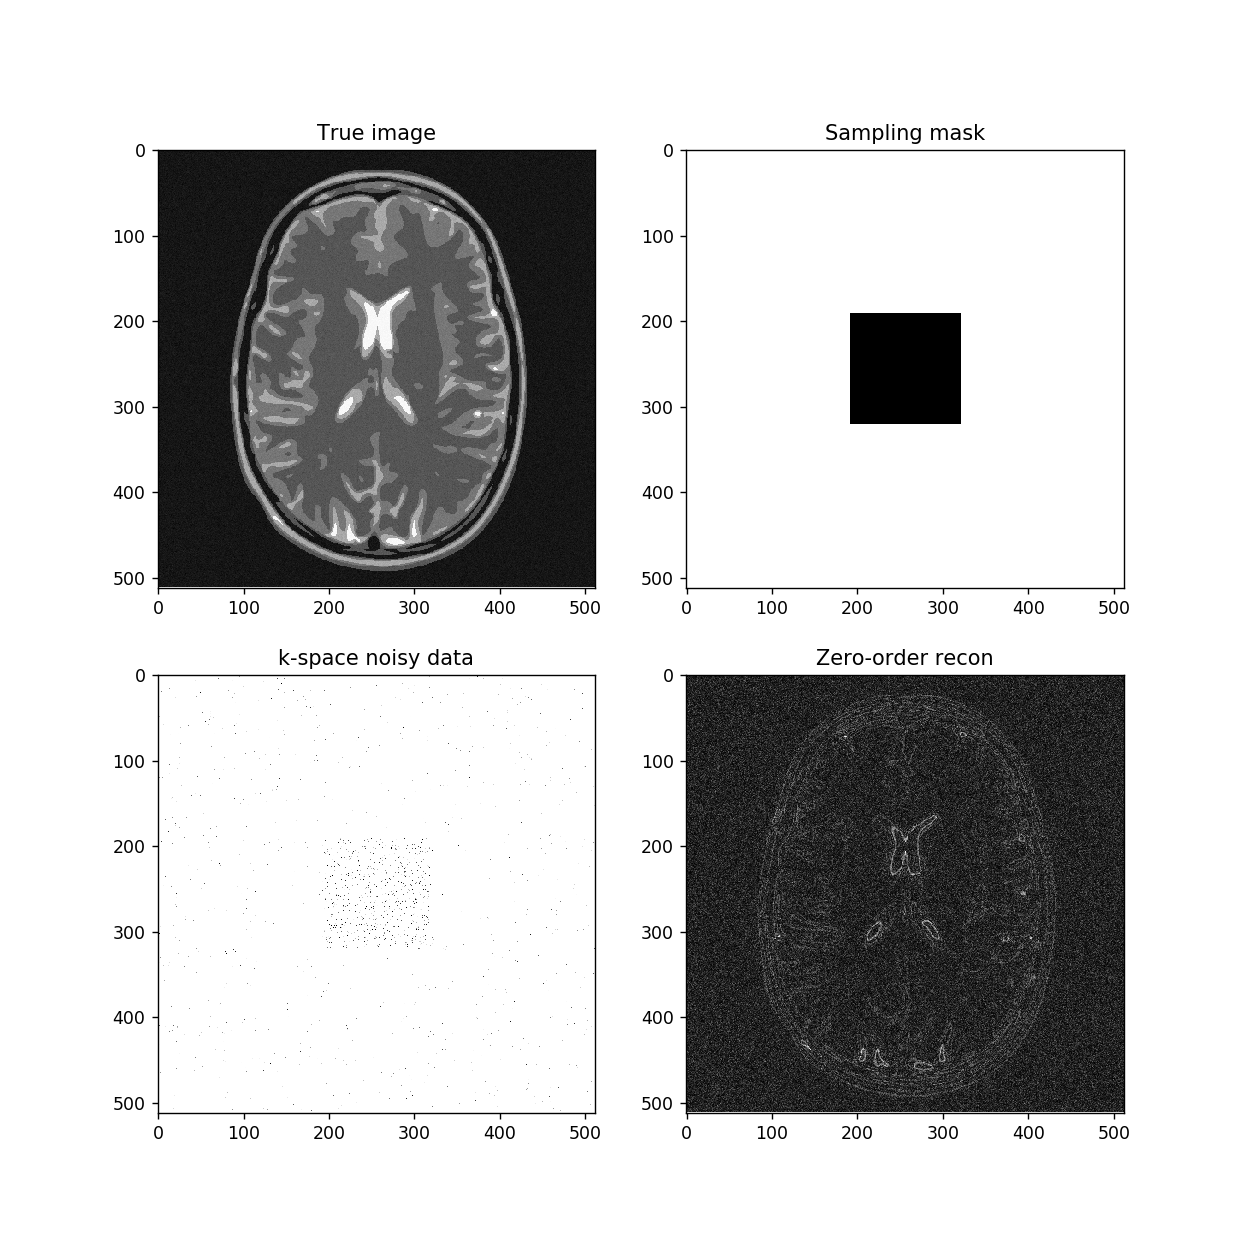

In [42]:
#import numpy.fft as fft
# Generate trivial Cartesian sampling masks
import numpy as np
import matplotlib.pyplot as plt
img_size = 512

mask="low_res"
factor_ctr = 8
mask="high_res"

if mask=="low_res":
    #low resolution/k-space center mask
    kspace_mask = np.zeros((img_size,img_size), dtype="float64")
    low_res_size = img_size/factor_ctr +1
    idx_vec= np.linspace( img_size/2-np.floor(low_res_size/2),img_size/2+np.floor(low_res_size/2),low_res_size)
    idx_vec_ =  idx_vec.astype("int")
#    kspace_mask[idx_vec_,idx_vec_] =1.
    for i in idx_vec_:
        for j in idx_vec_:
            kspace_mask[i,j]=1.
else: #high res only
    kspace_mask = np.ones((img_size,img_size), dtype="float64")
    low_res_size = img_size/(factor_ctr/2) +1 
    idx_vec= np.linspace( img_size/2-np.floor(low_res_size/2),img_size/2+np.floor(low_res_size/2),low_res_size)
    idx_vec_ =  idx_vec.astype("int")
    for i in idx_vec_:
        for j in idx_vec_:
            kspace_mask[i,j]=0.
#    kspace_mask[idx_vec,idx_vec] =0.
#print(mask)

if 0:
    plt.figure()
    plt.imshow(kspace_mask, cmap='Greys_r')
    plt.title("Sampling mask")
    plt.show()

norm = "ortho"
#norm = None
def fft(x):
    return np.fft.fft2(x, norm=norm)

def ifft(x):
    return np.fft.ifft2(x, norm=norm)

# Generate the subsampled kspace
kspace_data = np.fft.fftshift(fft(new_img)) * kspace_mask   # put the 0-freq in the middle of axes as
                                                            # mask is defined wrt center of k-space in the middle

    #noisy k-space data using Gaussian complex-valued random noise
signoise = 10
kspace_data += np.random.randn(*mri_img.shape) * signoise * (1+1j)
# Zero order solution
image_rec0 = ifft(np.fft.ifftshift(kspace_data))            # get back to the convention


fig, axs = plt.subplots(2, 2, figsize=(10, 10) )
axs[0,0].imshow(new_img, cmap='Greys_r')
axs[0,0].set_title("True image")
axs[0,1].imshow(kspace_mask, cmap='Greys_r')
axs[0,1].set_title("Sampling mask")
axs[1,0].imshow(np.abs(kspace_data),  cmap='gray', vmax=0.01*np.abs(kspace_data).max())
#axs[1].imshow(np.abs(np.fft.ifftshift(kspace_data)), cmap='Greys_r')
axs[1,0].set_title("k-space noisy data")
axs[1,1].imshow(np.abs(image_rec0), cmap='Greys_r')
axs[1,1].set_title("Zero-order recon")
plt.show()



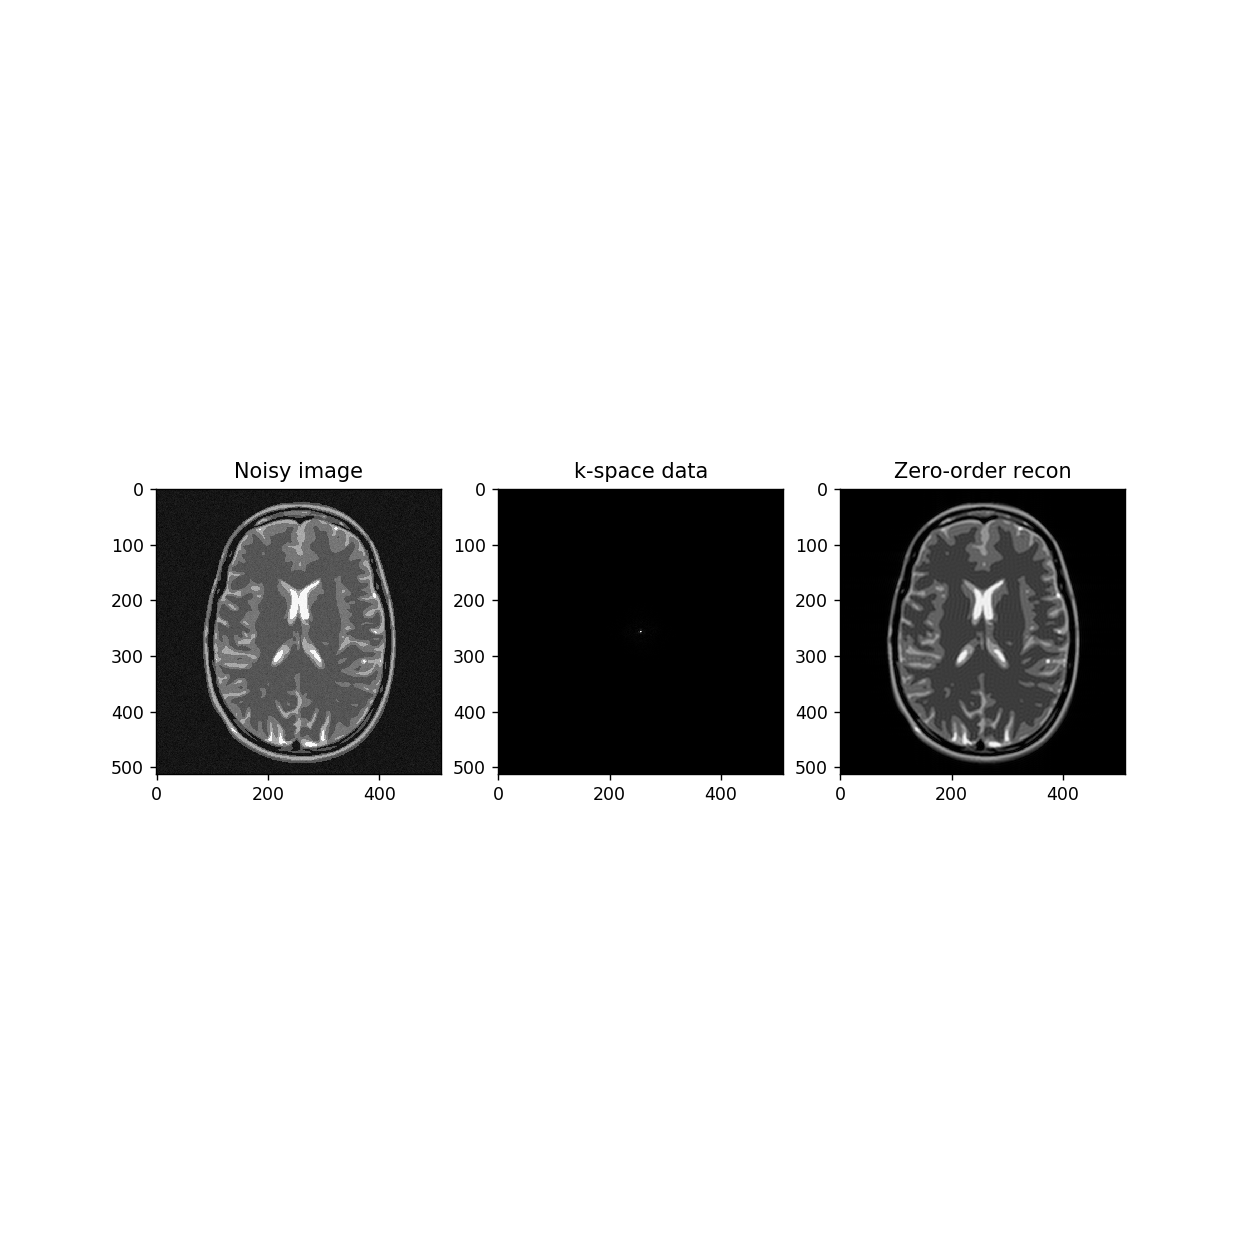

In [23]:
# Zero order reconstruction
import numpy as np
norm = "ortho"
#norm = None

def fft(x):
    return np.fft.fft2(x, norm=norm)

def ifft(x):
    return np.fft.ifft2(x, norm=norm)

# Generate the subsampled kspace
#kspace_data = fft(new_img) * kspace_mask
kspace_data = fft(mri_img) * np.fft.fftshift(kspace_mask)

# Zero order solution
image_rec0 = ifft(kspace_data)

#fig, axs = plt.subplots(1, 2, figsize=(5, 5), sharex=True, sharey=True)
#axs[0, 0].imshow(orginal_img, cmap='Greys_r')
#axs[0, 0].set_title("Noisy image")
#axs[0, 1].imshow(np.abs(kspace_data), cmap='Greys_r')
#axs[0, 1].plt.title("k-space data")
#plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(10, 10) )
axs[0].imshow(mri_img, cmap='Greys_r')
axs[0].set_title("True image")
axs[1].imshow(np.abs(np.fft.ifftshift(kspace_data)), cmap='Greys_r')
axs[1].set_title("k-space data")
axs[2].imshow(np.abs(image_rec0), cmap='Greys_r')
axs[2].set_title("Zero-order recon")
plt.show()
